In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Positioning in HR diagram

In [2]:
# We load the data
file_path = 'stars.txt'
columns = ["#SpT", "Teff", "logT", "logL", "R_Rsun", "Msun"]
data = pd.read_csv(file_path, sep='\s+', comment='#', names=columns, usecols=[0, 1, 2, 4, 6, 30])

# Make sure the columns are of the correct type
data['Teff'] = pd.to_numeric(data['Teff'], errors='coerce')
data['logT'] = pd.to_numeric(data['logT'], errors='coerce')
data['logL'] = pd.to_numeric(data['logL'], errors='coerce')
data['R_Rsun'] = pd.to_numeric(data['R_Rsun'], errors='coerce')
data['Msun'] = pd.to_numeric(data['Msun'], errors='coerce')

# Create a new column with the spectral type letter to filter later
data['SpT_letter'] = data['#SpT'].str.extract('([A-Za-z]+)')

# Calculate the luminosity
data['L'] = 10**data['logL']

# Select only the columns we are interested in
selected_columns = ['#SpT', 'SpT_letter', 'Teff', 'logT', 'L', 'logL', 'Msun', 'R_Rsun']
filtered_data = data[selected_columns]

# Filter the data by A-type stars
filtered_data_A = filtered_data[filtered_data['SpT_letter'].str.contains('A')]


In [3]:
# We bring the data of our sample of stars
data_sample = {
    "Name": ["Our Star", "Sirius", "Altair", "Vega", "Fomalhaut", "Denebola", "Delta Capricorni"],
    "Spectral type": ["A", "A0mA1 Va", "A7 V", "A0 Va", "A3 V", "A3 V", "A5 IV"],
    "Mass (M☉)": [2.514, 2.063, 1.79, 2.135, 1.91, 1.78, 2.0],
    "Radius (R☉)": [1.674, 1.711, 1.83, 2.59, 1.84, 1.73, 1.91],
    "Luminosity (L☉)": [11.843, 25.4, 10.6, 40.12, 16, 15, 11],
    "Effective Temperature (K)": [8284, 9904, 7697, 9025, 8509, 8635, 7605]
}

df_sample = pd.DataFrame(data_sample)

# Calcular logT y logL
df_sample['logT'] = np.log10(df_sample['Effective Temperature (K)'])
df_sample['logL'] = np.log10(df_sample['Luminosity (L☉)'])

# Seleccionar y renombrar las columnas según el formato anterior
df_sample = df_sample.rename(columns={
    "Spectral type": "#SpT",
    "Effective Temperature (K)": "Teff",
    "Mass (M☉)": "Msun",
    "Radius (R☉)": "R_Rsun",
    "Luminosity (L☉)": "L"
})

df_sample = df_sample[['Name', '#SpT', 'Teff', 'logT', 'L', 'logL', 'Msun', 'R_Rsun']]

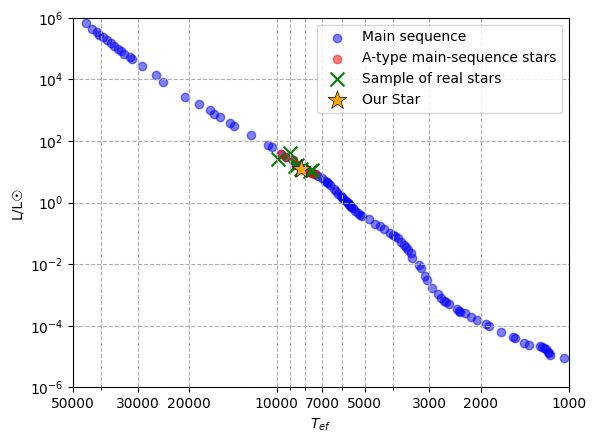

In [9]:
# We make a plot of the data
plt.scatter(filtered_data['Teff'], filtered_data['L'], color='blue', label='Main sequence', alpha=0.5)
plt.scatter(filtered_data_A['Teff'], filtered_data_A['L'], color='red', label='A-type main-sequence stars', alpha=0.5)
plt.scatter(df_sample['Teff'], df_sample['L'], color='green', label='Sample of real stars', marker='x', s=100)

# We highlight our star
highlight_star = df_sample[df_sample['Name'] == 'Our Star']
plt.scatter(highlight_star['Teff'], highlight_star['L'], color='orange', label='Our Star', marker='*', s=200, edgecolors='black', linewidths=0.5)

plt.ylim(1e-6, 1e6)
plt.yscale('log')

ticks = [1000, 2000, 3000, 5000, 7000, 10000, 20000, 30000, 50000]
plt.xscale('log')
plt.xticks(ticks, [str(t) for t in ticks])
plt.xlim(50000, 1000)
plt.grid(True, which="both", ls="--")

plt.xlabel('$T_{ef}$')
plt.ylabel('L/L☉')
plt.legend()
plt.grid(True)
plt.show()

# Zoom in the HR diagram

In [5]:
# We create a DataFrame with the data of the stars
data = {
    "Name": ["Our Star", "Sirius", "Altair", "Vega", "Fomalhaut", "Denebola", "Delta Capricorni"],
    "Spectral type": ["A", "A0mA1 Va", "A7 V", "A0 Va", "A3 V", "A3 V", "A5 IV"],
    "Mass (M☉)": [2.514, 2.063, 1.79, 2.135, 1.91, 1.78, 2.0],
    "Radius (R☉)": [1.674, 1.711, 1.83, 2.59, 1.84, 1.73, 1.91],
    "Luminosity (L☉)": [11.843, 25.4, 10.6, 40.12, 16, 15, 11],
    "Effective Temperature (K)": [8284, 9904, 7697, 9025, 8509, 8635, 7605]
}

df = pd.DataFrame(data)

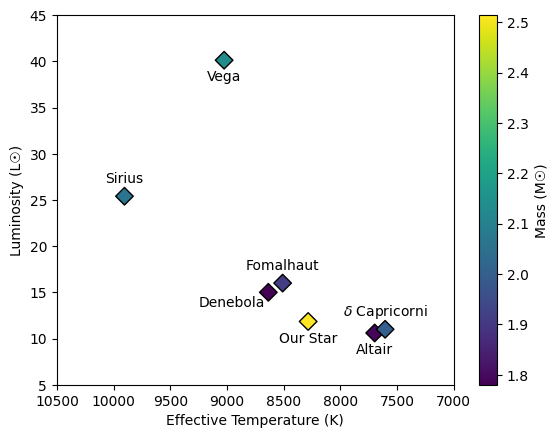

In [6]:
# Plot the stars in a Hertzsprung-Russell diagram
plt.figure()
sc = plt.scatter(df['Effective Temperature (K)'], df['Luminosity (L☉)'], c=df['Mass (M☉)'], cmap='viridis', s=80, marker = 'D', edgecolor = 'k')

# Colorbar for the mass of the stars
cbar = plt.colorbar(sc)
cbar.set_label('Mass (M☉)')

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (L☉)')
plt.xlim(10500, 7000)
plt.ylim(5, 45) 

# Annotate the stars one by one
plt.annotate('Our Star', (df['Effective Temperature (K)'][0], df['Luminosity (L☉)'][0]),
                textcoords="offset points", xytext=(0,-15), ha='center')
plt.annotate('Sirius', (df['Effective Temperature (K)'][1], df['Luminosity (L☉)'][1]),
                textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Altair', (df['Effective Temperature (K)'][2], df['Luminosity (L☉)'][2]),
                textcoords="offset points", xytext=(0,-15), ha='center')
plt.annotate('Vega', (df['Effective Temperature (K)'][3], df['Luminosity (L☉)'][3]),
                textcoords="offset points", xytext=(0,-15), ha='center')
plt.annotate('Fomalhaut', (df['Effective Temperature (K)'][4], df['Luminosity (L☉)'][4]),
                textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Denebola', (df['Effective Temperature (K)'][5], df['Luminosity (L☉)'][5]),
                textcoords="offset points", xytext=(-50,-10), ha = 'left')
plt.annotate('$\delta$ Capricorni', (df['Effective Temperature (K)'][6], df['Luminosity (L☉)'][6]),
                textcoords="offset points", xytext=(0,10), ha='center')
plt.show()
